---

In [1]:
from pathlib import Path

path = Path().absolute()

In [2]:
cd ../

c:\Users\c10nGp4\OneDrive\Documents\GitHub\imbalance-multi-classification


---

## Load Dataset
---

In [3]:
import pandas as pd

df = pd.read_csv(path / "assets/datasets/dataset-1.csv", delimiter=";")

## Instantiate Classifier
---

In [4]:
from pipeline.classification import Classification

clf = Classification()

2023-05-13 16:40:24 INFO: Downloading default packages for language: id (Indonesian) ...
2023-05-13 16:40:24 INFO: File exists: C:\Users\c10nGp4\stanza_resources\id\default.zip
2023-05-13 16:40:25 INFO: Finished downloading models and saved to C:\Users\c10nGp4\stanza_resources.
2023-05-13 16:40:25 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-05-13 16:40:25 INFO: Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |
| lemma     | gsd     |

2023-05-13 16:40:25 INFO: Using device: cuda
2023-05-13 16:40:25 INFO: Loading: tokenize
2023-05-13 16:40:27 INFO: Loading: mwt
2023-05-13 16:40:27 INFO: Loading: pos
2023-05-13 16:40:28 INFO: Loading: lemma
2023-05-13 16:40:28 INFO: Done loading processors!


## Analysis
---

In [5]:
from sklearn.model_selection import train_test_split

X = list(df["texts"])
y = list(df["targets"])

X, _1, y, _2 = train_test_split(
    X,
    y,
    train_size=.1,
    random_state=42,
    stratify=y
)

X_cleaned = clf.clean(X)
X_tokenized = clf.tokenize(X_cleaned)
X_train, X_test, y_train, y_test = clf.train_test_split(X_tokenized, y)

# best_hyperparameters, estimation, grid_search = clf.tuning(X_train, y_train)[0]

best_hyperparameters = {
    'svc__C': 10000,
    'svc__decision_function_shape': 'ovo',
    'svc__gamma': 0.0001,
    'svc__kernel': 'rbf',
    'tfidfvectorizer__max_df': 0.2,
    'tfidfvectorizer__min_df': 1,
    'tfidfvectorizer__ngram_range': (1, 2),
    'tfidfvectorizer__norm': 'l2'
}

model = clf.train(X_train, y_train, best_hyperparameters)
y_pred = clf.test(model, X_test)
_, mcc = clf.score(y_test, y_pred)

print("MCC:", mcc)

Lemmatization: 100%|██████████| 1770/1770 [00:00<00:00, 221272.63it/s]

MCC: 0.5486765614593534


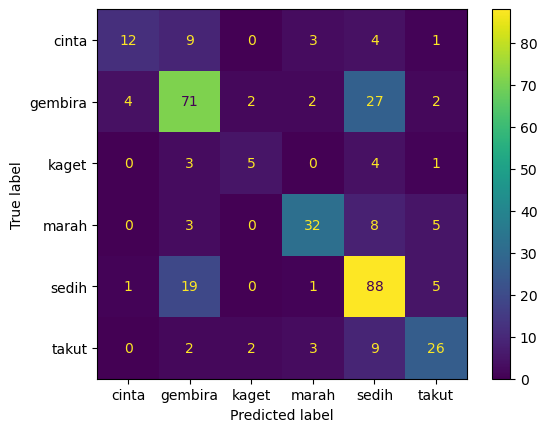

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model.classes_)
disp.plot()

plt.show()
